# Deteccção de fraudes em cartões de crédito

   Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e fintechs. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.



<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

 Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.
No Brasil, uma pesquisa realizada pela Kaspersky, aponta que 20% das pessoas no país já sofreram fraudes online de cartão de crédito. Na pesquisa “Impressões Digitais e sua relação com as pessoas e as empresas”, realizada pela Kaspersky mostram que há uma negligência pelos usuários. Segundo o SERASA o cartão de crédito é o meio de pagamento mais comum no Brasil sendo cerca de 70% dos brasileiros possuírem pelo menos três cartões.


Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em Data Science. 
Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados


Os dados que usaremos neste projeto foram disponibilizados por algumas empresas europeias de cartão de crédito. Os dados representam as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor ou igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.


In [1]:
# importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#melhorando resolução dos gráficos
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

sns.set_theme(style="white", palette="flare")

No momendo de importação dos dados é importante já separa-los dos dados de testes. Pois isso evitará de a avaliação estar enviesada. 

In [2]:
# importando os dados
PATH = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"
df = pd.read_csv(PATH)

df_test = df.sample(frac=0.15, random_state=0)

df = df.drop(df_test.index)

## Análise exploratória

Veremos então como estão esses dados. Primerias entradas, últimas entradas e o volume dos dados. 

In [3]:
display(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Visto que esse conjunto de dados possuem 242086 entradas e 31 variáveis. 

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Informações dos dados

As variáveis Time e Amount foram preservadas, e correspondem ao tempo e a quantia. A variável Class é a variável alvo. Ela contém valores de 0 e 1. Em que:
* 0 são transações normais; e
* 1 são transações fraudulentas. 

In [5]:
#resumo estatístico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,...,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000
mean,94857.597379,0.001456,-0.000800,-0.001004,0.000647,-0.000986,-0.001196,-0.000033,-0.000416,-0.000725,...,-0.000015,0.000606,-0.000482,0.000199,0.000048,-0.000269,-0.000727,0.000065,88.612429,0.001727
std,47490.660832,1.956513,1.654883,1.514580,1.417228,1.366284,1.326879,1.223095,1.199718,1.099350,...,0.734189,0.726284,0.629651,0.605150,0.521574,0.482084,0.401490,0.327734,247.655020,0.041517
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54234.000000,-0.920406,-0.598659,-0.893374,-0.848236,-0.693615,-0.769025,-0.553805,-0.208857,-0.645058,...,-0.228492,-0.542962,-0.161941,-0.354494,-0.316853,-0.327387,-0.070744,-0.052903,5.662500,0.000000
50%,84747.000000,0.019230,0.064567,0.177607,-0.018959,-0.054544,-0.274310,0.040344,0.022160,-0.051370,...,-0.028987,0.007162,-0.011175,0.040764,0.017175,-0.052337,0.001131,0.011209,22.000000,0.000000
75%,139362.000000,1.316034,0.803174,1.026561,0.743691,0.611455,0.397688,0.570104,0.327186,0.597195,...,0.187064,0.529814,0.147358,0.439320,0.350795,0.241214,0.090776,0.078234,77.580000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


Aparentemente nas variáveis Time e as outras as outras não há nenhuma discrepância aparente. Na variável Amount, que indica o valor das transações, o valor médio é 88,61, mediana igual a 22 e com desvio padrão de 247,65. Seu valor máximo é de 25691,16. É visto que a maioria das transações são de quantias menores de acordo com o esperado. 

In [6]:
# valores ausentes
df.isnull().sum().max()

0

É visto que não há dados ausentes.

In [7]:
# quantidade dos dados em classe
print(df.Class.value_counts())

0    241668
1       418
Name: Class, dtype: int64


In [8]:
print('Fraudes representam {:.4f}% dos dados.'.format((df[df.Class==1].shape[0]/df.shape[0])*100))

Fraudes representam 0.1727% dos dados.


### Gráficos

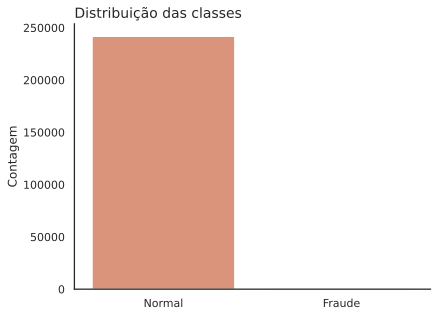

In [9]:
fig, ax = plt.subplots()

ax = sns.countplot(x=df.Class, data=df)
ax.set_title("Distribuição das classes", loc='left', fontsize=14)
ax.set_xticklabels(['Normal', 'Fraude'])
ax.set_ylabel("Contagem")
ax.set_xlabel(" ")
sns.despine()
plt.savefig('DistribuiçãodasClasses.png', dpi=100, bbox_inches='tight')
plt.show()

Agora, é interessante verificar a distribuição dos valores das variáveis Time e Amount de acordo com as Classes.

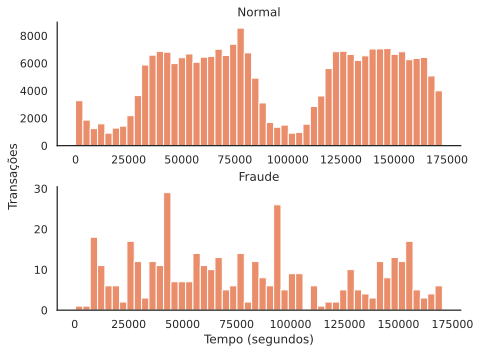

In [10]:
fig, ax = plt.subplots(nrows = 2, ncols=1, constrained_layout = True)

ax[0].hist(df.Time[df.Class==0], bins=50)
ax[1].hist(df.Time[df.Class==1], bins=50)

ax[0].set_title("Normal")
ax[1].set_title("Fraude")

plt.xlabel('Tempo (segundos)')
fig.text(-0.02, 0.5, 'Transações', va='center', rotation='vertical')

sns.despine()

plt.savefig('hist_time.png', dpi=100, bbox_inches='tight')
plt.show()

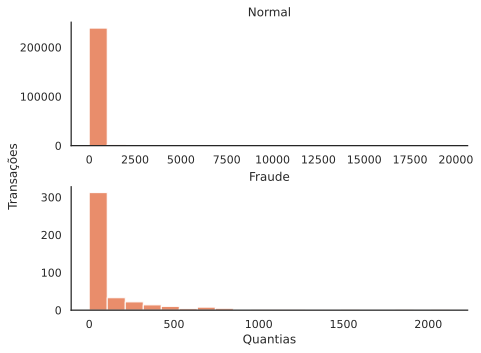

In [11]:
fig, ax = plt.subplots(nrows = 2, ncols=1, constrained_layout = True)

ax[0].hist(df.Amount[df.Class==0], bins=20)
ax[1].hist(df.Amount[df.Class==1], bins=20)

ax[0].set_title("Normal")
ax[1].set_title("Fraude")

plt.xlabel('Quantias')
fig.text(-0.02, 0.5, 'Transações', va='center', rotation='vertical')

sns.despine()

plt.savefig('hist_amount.png', dpi=100, bbox_inches='tight')
plt.show()

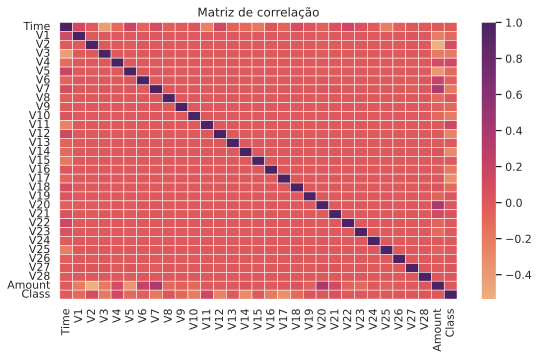

In [13]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(8,5))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.5, cmap="flare", ax=ax) 

plt.tight_layout()
plt.title("Matriz de correlação")

plt.savefig('correlation_first.png', dpi=100, bbox_inches='tight')
plt.show()

Visto no gráfico de correlações que não há correlações fortes entre as variáveis.

Algo considerável é visualizar gráficos de densidade. O gráfico é úlil para compararmos as variáveis distribuidas em cada classe. Também pode ser visto anomalias, pois oque se procurar nesses gráficos são distribuições que se diferem. 

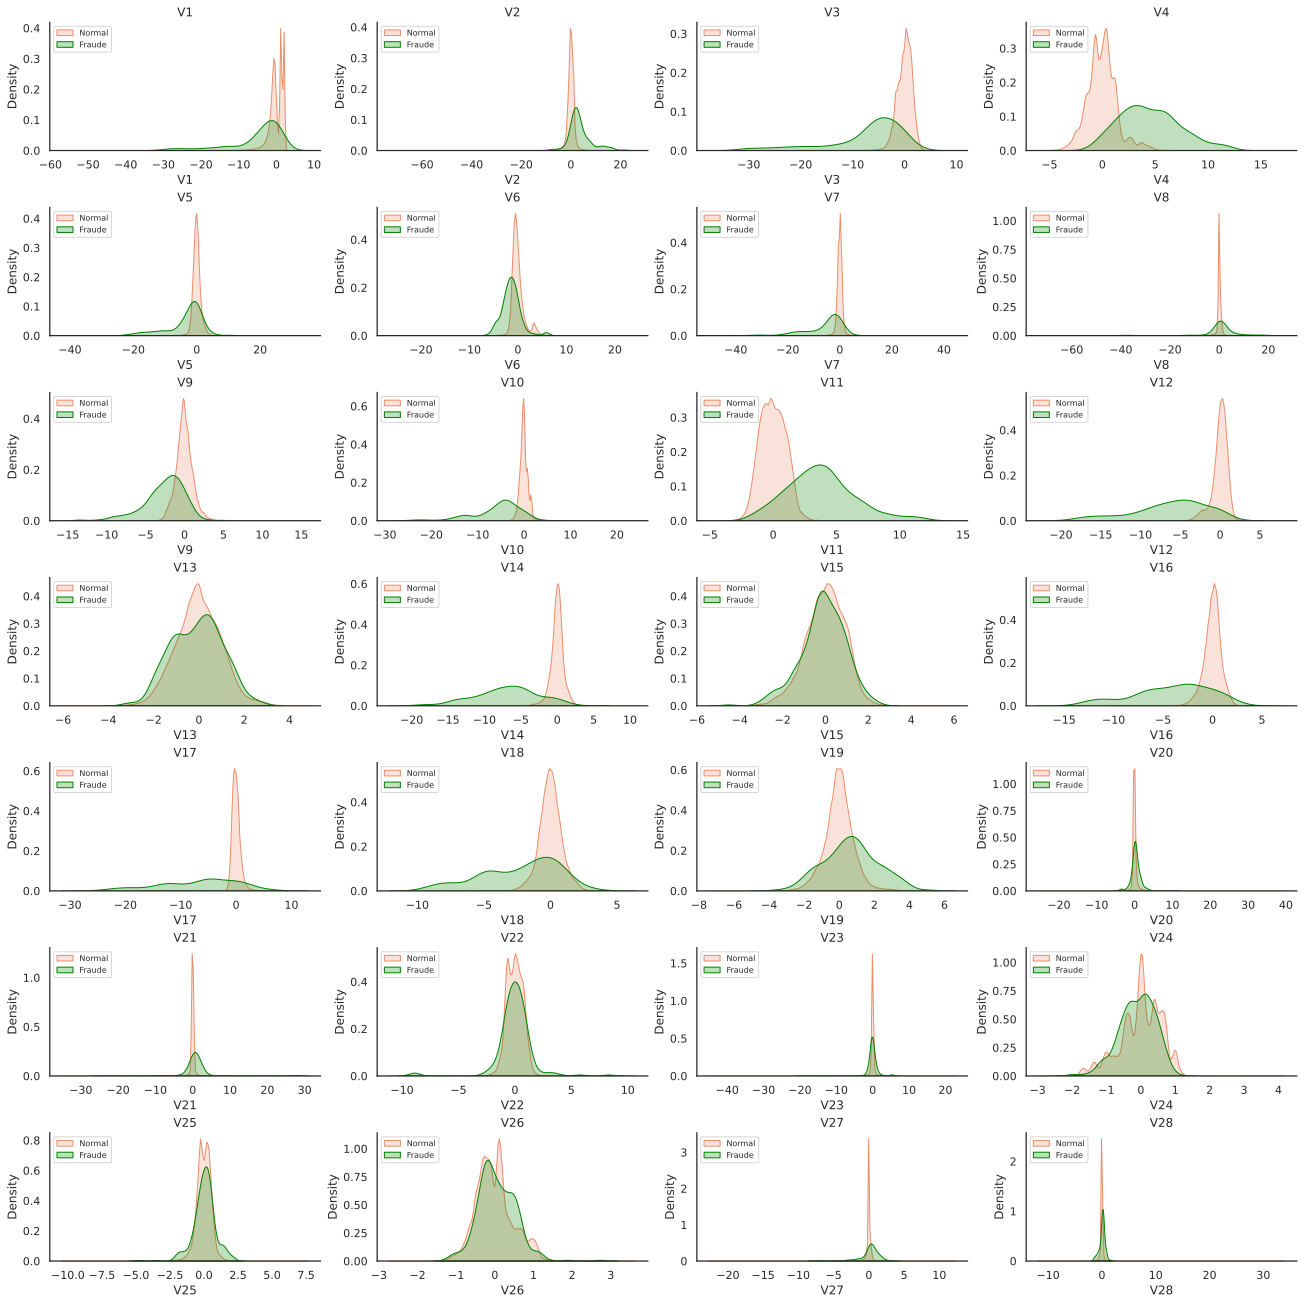

In [15]:
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots=len(column_names)
df_normal=df[df.Class==0]
df_fraud=df[df.Class==1]

fig, ax = plt.subplots(nrows=7, ncols=4, constrained_layout = True, figsize=(18,18))

idx = 0


for col in column_names:
    idx += 1
    plt.subplot(7,4,idx)
    sns.kdeplot(df_normal[col], label="Normal", shade=True)
    sns.kdeplot(df_fraud[col], label="Fraude", shade=True, color="green")
    plt.title(col)
    plt.legend(loc='upper left', fontsize=8)
    
sns.despine()

plt.savefig('density.png', dpi=200, bbox_inches='tight')
plt.show()

Mesmo com as colunas não identificadas verifica-se distinção das classes nas variáveis V3, V4, V10, V11. E similaridade nas variáveis V8, V13 e V15.

### Conclusões da análise exploratória

* Existe um desbalanceamento nos dados pois as fraudes ocorre em 0,17% dos dados. 
* Nesses dados não há valores ausentes
* Sabendo que o PCA é sensível à escala das variáveis é possível assumir que as features originiais estão balanceadas. 
* As colunas Time e Amount não estão normalizadas. 

## Preparando os dados

Para usar os dados nos modelos de classificação que serão utilizados é necessário:
* Padronizar as features Time e Amount
* Dividir os dados entre treino e validação
* Balancear os dados, evitando haver *overfitting*

In [16]:
from  sklearn.preprocessing import StandardScaler

**Padronização de Time e Amount**

Para a padronização será feita por meio da classe StandardScaler. A documentação diz que isso:

"Padroniza as features removendo a média e escala a variância a uma unidade"

Isto é que para cada feature a média será 0, e o desvio padrão igual 1. Assim, essa padronização, torna os dados mais manejáveis para os modelos.

In [17]:
# criando um chekpoint
df_new = df.copy()

# padronizando os dados

std_scaler = StandardScaler()

df_new['std_Amount'] = std_scaler.fit_transform(df_new['Amount'].values.reshape(-1,1))
df_new['std_Time'] = std_scaler.fit_transform(df_new['Time'].values.reshape(-1,1))

df_new.drop(['Amount', 'Time'], axis=1, inplace=True)

In [18]:
display(df_new)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_Amount,std_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,...,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,0,-0.346945,1.640903
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.257708,1.640945
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.083715,1.640966
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.317428,1.640966


**Divisão dos dados entre Treino e Validação**

Para isso será realizado um split para separação desses conjuntos.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df_new.drop('Class', axis=1)
y = df_new['Class']

In [22]:
# split nos dados para: treino e validação
X_train, X_val, y_train, y_val = train_test_split(X,y, stratify=y, shuffle=True)

**Balanceamento dos dados**

Com os dados separados será realizado então o balanceamneto. Como mostrado anteriormente os dados de fraudes só correspondem a 0,17% do conjunto total. Assim será usado o *Under_smapling* que reduz o desbalanceamento mas preserva a menor classe. 

In [23]:
from imblearn.under_sampling import RandomUnderSampler

In [24]:
rus = RandomUnderSampler()

In [25]:
# balacemando dos dados de treino
X_rus, y_rus = rus.fit_resample(X_train, y_train)

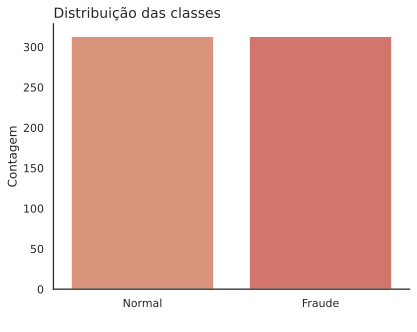

In [27]:
fig, ax = plt.subplots()

ax = sns.countplot(x=y_rus)
ax.set_title("Distribuição das classes", loc='left', fontsize=14)
ax.set_xticklabels(['Normal', 'Fraude'])
ax.set_ylabel("Contagem")
ax.set_xlabel(" ")
sns.despine()

plt.savefig('balanced_data.png', dpi=100, bbox_inches='tight')
plt.show()

## Modelos de Machine Learning

Nesta etapa vamos usar três modelos para classificação:
* **Logistic Regression**
* **KN Means**
* **Support Vector Machine**

Após o treinamento dos modelos será avaliado então os seus desempenhos. 

**Organizando os dados de testes**

Antes de realizar a aplicação dos modelos para facilitar na aplicação será separado e organizado os dados que serão usados para testar o modelo. Esses dados já foram separados anteriormente.

In [28]:
test = df_test.copy()

In [29]:
# padronização dos dados
std_scaler = StandardScaler()

test['std_Amount'] = std_scaler.fit_transform(test['Amount'].values.reshape(-1,1))
test['std_Time'] = std_scaler.fit_transform(test['Time'].values.reshape(-1,1))

test.drop(['Amount', 'Time'], axis=1, inplace=True)

# separando as variaveis x e y
X_test = test.drop('Class', axis=1)
y_test = test['Class']

**Importando as métricas de avaliação**

In [30]:
# importando as métricas para avaliação dos modelos:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix

**Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
modellr = LogisticRegression()

In [33]:
modellr.fit(X_rus, y_rus)

LogisticRegression()

Realizando as previsões para o modelo de Regressão Logística

In [34]:
y_pred = modellr.predict(X_val)
y_proba = modellr.predict_proba(X_val)

**Avaliação do modelo de Regressão Logística**

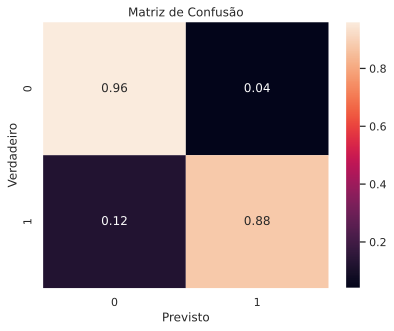

In [36]:
cm = confusion_matrix(y_val, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
sns.heatmap(cmn, annot=True, fmt='.2f')

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.savefig('confusionmatrix_logisticregression.png', dpi=100, bbox_inches='tight')
plt.show()

In [37]:
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9595    0.9792     60417
           1     0.0363    0.8762    0.0696       105

    accuracy                         0.9594     60522
   macro avg     0.5180    0.9179    0.5244     60522
weighted avg     0.9981    0.9594    0.9777     60522

Acurácia: 0.9594

AUC: 0.9179



In [38]:
y_pred_test = modellr.predict(X_test)
y_proba_test = modellr.predict_proba(X_test)

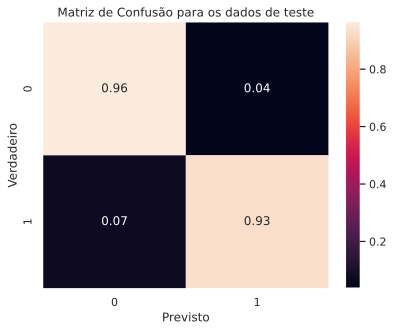

In [41]:
cm = confusion_matrix(y_test, y_pred_test)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
sns.heatmap(cmn, annot=True, fmt='.2f')

ax.set_title("Matriz de Confusão para os dados de teste")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.savefig('confusionmatrixtest_logisticregression.png', dpi=100, bbox_inches='tight')
plt.show()

In [42]:
# imprimir relatório de classificação
print("Relatório de Classificação dos dados de teste:\n", classification_report(y_test, y_pred_test, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_test)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_test)))

Relatório de Classificação dos dados de teste:
               precision    recall  f1-score   support

           0     0.9999    0.9625    0.9808     42647
           1     0.0413    0.9324    0.0792        74

    accuracy                         0.9624     42721
   macro avg     0.5206    0.9475    0.5300     42721
weighted avg     0.9982    0.9624    0.9793     42721

Acurácia: 0.9624

AUC: 0.9475



**KNeighborsClassifier**

In [43]:
from sklearn.neighbors import KNeighborsClassifier


In [45]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_rus, y_rus)

KNeighborsClassifier(n_neighbors=2)

In [46]:
y_pred = neigh.predict(X_val)
y_proba = neigh.predict_proba(X_val)

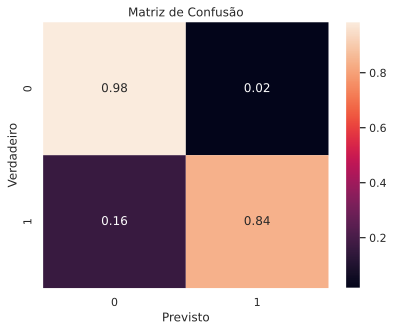

In [47]:
cm = confusion_matrix(y_val, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
sns.heatmap(cmn, annot=True, fmt='.2f')

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.savefig('confusionmatrix_KNeighborsClassifier.png', dpi=100, bbox_inches='tight')
plt.show()

In [48]:
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9997    0.9834    0.9915     60417
           1     0.0809    0.8381    0.1475       105

    accuracy                         0.9832     60522
   macro avg     0.5403    0.9108    0.5695     60522
weighted avg     0.9981    0.9832    0.9901     60522

Acurácia: 0.9832

AUC: 0.9108



In [49]:
# aplicando modelo para os dados de teste
y_pred_test = neigh.predict(X_test)
y_proba_test = neigh.predict_proba(X_test)

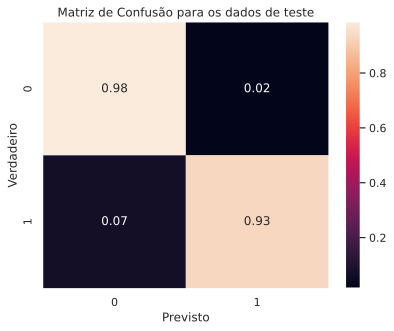

In [50]:
cm = confusion_matrix(y_test, y_pred_test)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
sns.heatmap(cmn, annot=True, fmt='.2f')

ax.set_title("Matriz de Confusão para os dados de teste")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.savefig('confusionmatrixtest_KNeighborsClassifier.png', dpi=100, bbox_inches='tight')
plt.show()

In [51]:
# imprimir relatório de classificação
print("Relatório de Classificação dos dados de teste:\n", classification_report(y_test, y_pred_test, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_test)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_test)))

Relatório de Classificação dos dados de teste:
               precision    recall  f1-score   support

           0     0.9999    0.9841    0.9919     42647
           1     0.0924    0.9324    0.1681        74

    accuracy                         0.9840     42721
   macro avg     0.5461    0.9583    0.5800     42721
weighted avg     0.9983    0.9840    0.9905     42721

Acurácia: 0.9840

AUC: 0.9583



**Support Vector Machines**

In [53]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_rus, y_rus)

SVC()

In [55]:
y_pred = clf.predict(X_val)

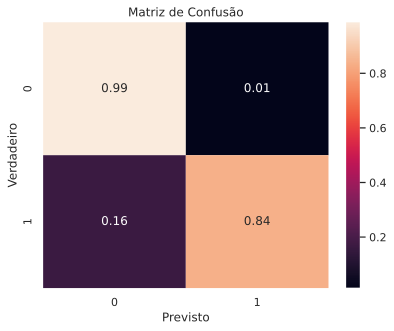

In [56]:
cm = confusion_matrix(y_val, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
sns.heatmap(cmn, annot=True, fmt='.2f')

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.savefig('confusionmatrix_SupportVectorMachines.png', dpi=100, bbox_inches='tight')
plt.show()

In [57]:
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9997    0.9869    0.9933     60417
           1     0.1002    0.8381    0.1790       105

    accuracy                         0.9867     60522
   macro avg     0.5500    0.9125    0.5862     60522
weighted avg     0.9982    0.9867    0.9919     60522

Acurácia: 0.9867

AUC: 0.9125



In [58]:
y_pred_test = clf.predict(X_test)

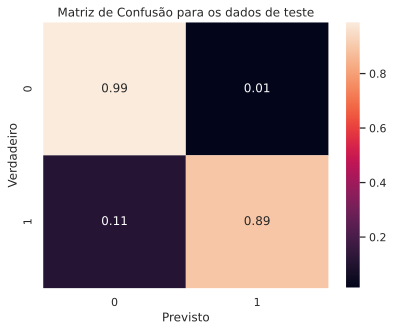

In [59]:
cm = confusion_matrix(y_test, y_pred_test)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
sns.heatmap(cmn, annot=True, fmt='.2f')

ax.set_title("Matriz de Confusão para os dados de teste")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.savefig('confusionmatrixtest_SupportVectorMachines.png', dpi=100, bbox_inches='tight')
plt.show()

In [60]:
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9997    0.9869    0.9933     60417
           1     0.1002    0.8381    0.1790       105

    accuracy                         0.9867     60522
   macro avg     0.5500    0.9125    0.5862     60522
weighted avg     0.9982    0.9867    0.9919     60522

Acurácia: 0.9867

AUC: 0.9125



## Conclusão

Observemos que estudar esses dados não é simples. Apesar dos dados já estarem bem tratados e limpos, sem valores ausentes ou variáveis categóricas.Porém o desbalanceamento e a Transformação PCA demandaram um trabalho considerável.

Avaliando as métricas para cada modelo, escolhemos para conclusão o modelo AUC, que corresponde a área da curva de um gráfico da taxa de valores Verdadeiros Positivos em função da taxa de Falsos Positivos. Percebemos que todos os modelos tiveram bons valores (<0.9), porém o modelo KNeighborsClassifier se destaca com o valor de 0.95 quando aplicado aos dados de testes. 
